In [72]:
%load_ext autoreload
%autoreload 2
from models.diffusion import StableDiffusion
import torch
from torchvision import transforms
from transformers import CLIPTokenizer
from PIL import Image
from utils.model_converter import load_weights_from_ckpt


prompt = "A dog wearing a hat"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

# Comment to disable image to image
input_image = None
image_path = "./images/dog.jpg"
input_image = Image.open(image_path).convert('RGB')

# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.1

## SAMPLER
num_inference_steps = 50
seed = 42
model = StableDiffusion(model_type='txt2img')
loaded_state_dict = load_weights_from_ckpt('./weights/model/v1-5-pruned-emaonly.ckpt', device='cpu')
model.vae.load_state_dict(loaded_state_dict['vae'], strict=True)
model.unet.load_state_dict(loaded_state_dict['unet'], strict=True)
model.cond_encoder.load_state_dict(loaded_state_dict['cond_encoder'], strict=True)

tokenizer = CLIPTokenizer('./weights/tokenizer/tokenizer_vocab.json', merges_file='./weights/tokenizer/tokenizer_merges.txt')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
%load_ext autoreload
%autoreload 2
output_image = model.generate(
    input_image=input_image,
     prompt=prompt,
     uncond_promt=uncond_prompt,
     do_cfg=do_cfg,
     cfg_scale=cfg_scale,
     device='mps',
     strength=strength,
     inference_steps=num_inference_steps,
     sampler='ddpm',
     use_cosine_schedule=False,
     seed=seed,
     tokenizer=tokenizer
)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 40%|███████████████████████████████▏                                              | 2/5 [00:24<00:30, 10.00s/it]

0
0


100%|██████████████████████████████████████████████████████████████████████████████| 5/5 [00:24<00:00,  4.90s/it]

0
0
0


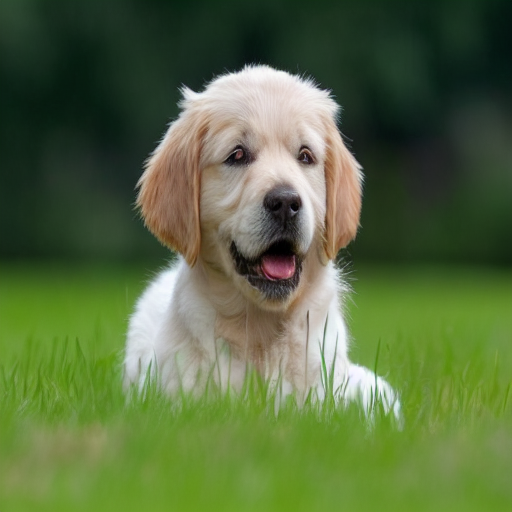

In [83]:
Image.fromarray(output_image)

In [13]:
%load_ext autoreload
%autoreload 2
!PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 python3 train.py --device=cpu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  0%|                                                   | 0/300 [00:00<?, ?it/s]
0it [00:00, ?it/s]cpu

1it [00:48, 48.37s/it]cpu
^C
1it [00:52, 52.45s/it]
